## Exploratory Analysis

Useful websites
* https://neuraldatascience.io/8-mri/nifti.html
* https://lukas-snoek.com/NI-edu/fMRI-introduction/week_1/python_for_mri.html

### Setup

In [13]:
# Image settings
from nilearn import plotting
import pylab as plt
%matplotlib inline

import numpy as np
import nibabel as nib
import os
import imageio as iio
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

### Load and inspect images

In [11]:
data_folder_path = f"{os.getcwd()}/data"
data_folder = os.listdir(data_folder_path)
data_folder

['VIGO_02', 'ARE', 'ICS', 'MMPG', 'VIGO_01', 'VIGO_03']

Check the shapes of the scans

In [14]:
unique_shapes = set()
for folder in data_folder:
    folder_full_path = os.path.join(data_folder_path, folder)
    if os.path.isdir(folder_full_path):
        for file in os.listdir(folder_full_path):
            file_path = os.path.join(folder_full_path, file)
            if file.endswith('.nii') or file.endswith('.nii.gz'):
                brain_volume = nib.load(file_path)
                brain_volume_shape = brain_volume.shape
                unique_shapes.add(brain_volume_shape)

if len(unique_shapes) == 1:
    print("All images have the same shape:", unique_shapes.pop())
else:
    print("Different shapes found:", unique_shapes)

Different shapes found: {(300, 256, 256), (240, 240, 147), (288, 288, 245), (560, 560, 23), (256, 256, 24), (360, 256, 256), (160, 400, 400), (180, 288, 288), (327, 256, 256), (256, 256, 236), (352, 352, 21), (240, 240, 180), (512, 512, 24), (288, 288, 200), (352, 352, 23)}


Inspect and visualize one image

In [38]:
brain_vol = nib.load(f'{os.getcwd()}/data/ICS/ICS_FLAIR.nii')

In [39]:
print(brain_vol.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 288 288 200   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        0.7986111 0.7986111 0.8       5.        0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'TE=3.8e+02;Time=173805.570'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.053751584
quatern_c       : 0.015769899
quatern_d       : 0.016676104
qoffset_x       : -1

### Access specific parameters

In [40]:
brain_vol_data = brain_vol.get_fdata()
brain_vol_data.shape

(288, 288, 200)

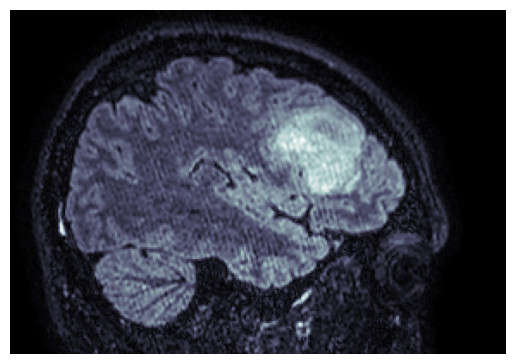

In [41]:
plt.imshow(ndi.rotate(brain_vol_data[96], 90), cmap='bone')
plt.axis('off')
plt.show()

### Plot a series of slices

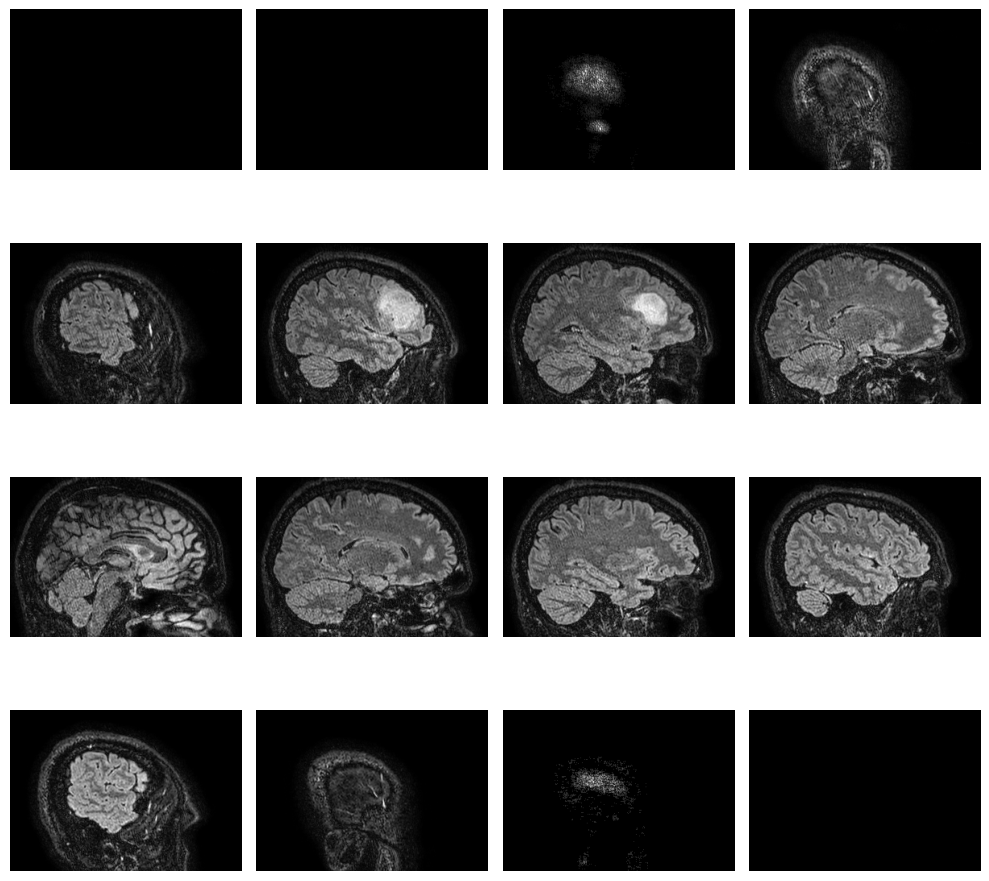

In [42]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(brain_vol_data[img, :, :], 90), cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()

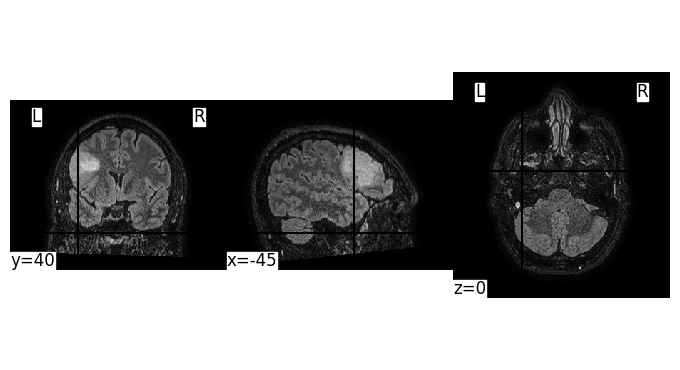

In [43]:
from nilearn import plotting

plotting.plot_img(brain_vol, cmap='gray', cut_coords=(-45, 40, 0))
plt.show()

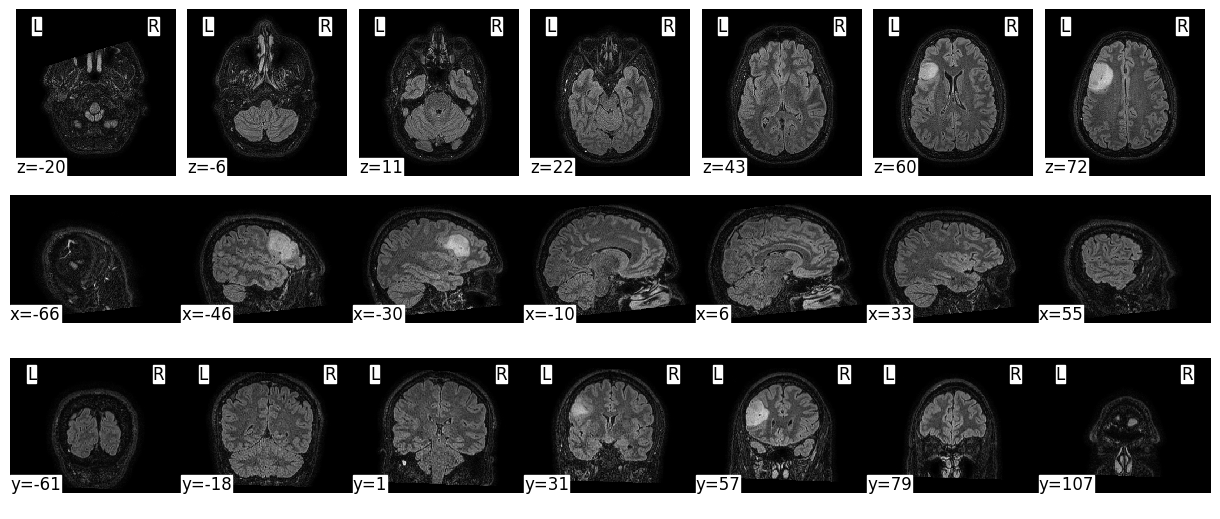

In [44]:
plotting.plot_img(brain_vol, display_mode='mosaic', cmap='gray')
plt.show()